In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("iris-write-from-docker.csv", na_values=[" ?"])

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 5)

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [6]:
cols = ['class']

for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['class']), df['class'], test_size = 0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((120, 4), (120,), (30, 4), (30,))

In [10]:
scaler = MinMaxScaler()

In [11]:
min_max_scaler=preprocessing.MinMaxScaler()

In [12]:
cols_norm=['sepal_length','sepal_width','petal_length','petal_width']

In [13]:
df[cols_norm]=min_max_scaler.fit_transform(df[cols_norm])
#df

In [14]:
corr = df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [15]:
algos = []
accuracy = []
recall = []
precision = []
f1Score = []
specificity = []

In [16]:
algo = "Logistic Regression"
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy for K Nearest Neighbour is :', acc)
rec = recall_score(y_test, y_pred,average='micro') * 100
print('Recall K Nearest Neighbour is :', rec)
pre = precision_score(y_test, y_pred,average='micro') * 100
print('Precision is K Nearest Neighbour :', pre)
f1s = f1_score(y_test, y_pred,average='micro') * 100
print('F1 score is K Nearest Neighbour :', f1s)
sp1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Specificity:', sp1)
specificity.append(sp1)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Logistic Regression
[[ 6  0  0]
 [ 0 12  0]
 [ 0  0 12]] 


Accuracy for K Nearest Neighbour is : 100.0
Recall K Nearest Neighbour is : 100.0
Precision is K Nearest Neighbour : 100.0
F1 score is K Nearest Neighbour : 100.0
Specificity: 1.0


In [17]:
algo = "Decision Tree"
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy for K Nearest Neighbour is :', acc)
rec = recall_score(y_test, y_pred,average='micro') * 100
print('Recall K Nearest Neighbour is :', rec)
pre = precision_score(y_test, y_pred,average='micro') * 100
print('Precision is K Nearest Neighbour :', pre)
f1s = f1_score(y_test, y_pred,average='micro') * 100
print('F1 score is K Nearest Neighbour :', f1s)
sp1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Specificity:', sp1)
specificity.append(sp1)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Decision Tree
[[ 6  0  0]
 [ 0 12  0]
 [ 0  0 12]] 


Accuracy for K Nearest Neighbour is : 100.0
Recall K Nearest Neighbour is : 100.0
Precision is K Nearest Neighbour : 100.0
F1 score is K Nearest Neighbour : 100.0
Specificity: 1.0


In [18]:
algo = "GradientBoost"
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy for K Nearest Neighbour is :', acc)
rec = recall_score(y_test, y_pred,average='micro') * 100
print('Recall K Nearest Neighbour is :', rec)
pre = precision_score(y_test, y_pred,average='micro') * 100
print('Precision is K Nearest Neighbour :', pre)
f1s = f1_score(y_test, y_pred,average='micro') * 100
print('F1 score is K Nearest Neighbour :', f1s)
sp1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Specificity:', sp1)
specificity.append(sp1)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

GradientBoost
[[ 6  0  0]
 [ 0 12  0]
 [ 0  0 12]] 


Accuracy for K Nearest Neighbour is : 100.0
Recall K Nearest Neighbour is : 100.0
Precision is K Nearest Neighbour : 100.0
F1 score is K Nearest Neighbour : 100.0
Specificity: 1.0


In [19]:
algo = "Random forest"
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(algo)
cm1=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred), '\n\n')
acc = accuracy_score(y_test, y_pred) * 100
print('Accuracy for K Nearest Neighbour is :', acc)
rec = recall_score(y_test, y_pred,average='micro') * 100
print('Recall K Nearest Neighbour is :', rec)
pre = precision_score(y_test, y_pred,average='micro') * 100
print('Precision is K Nearest Neighbour :', pre)
f1s = f1_score(y_test, y_pred,average='micro') * 100
print('F1 score is K Nearest Neighbour :', f1s)
sp1=cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Specificity:', sp1)
specificity.append(sp1)

algos.append(algo)
accuracy.append(acc)
recall.append(rec)
precision.append(pre)
f1Score.append(f1s)

Random forest
[[ 6  0  0]
 [ 0 12  0]
 [ 0  0 12]] 


Accuracy for K Nearest Neighbour is : 100.0
Recall K Nearest Neighbour is : 100.0
Precision is K Nearest Neighbour : 100.0
F1 score is K Nearest Neighbour : 100.0
Specificity: 1.0


In [20]:
Comparison = pd.DataFrame(list(zip(algos,accuracy,recall,precision,f1Score,specificity)), columns = ['Algorithm', 'Accuracy', 'Recall','Precision','F score','Specificity'])
Comparison

,Algorithm,Accuracy,Recall,Precision,F score,Specificity
0,Logistic Regression,100.0,100.0,100.0,100.0,1.0
1,Decision Tree,100.0,100.0,100.0,100.0,1.0
2,GradientBoost,100.0,100.0,100.0,100.0,1.0
3,Random forest,100.0,100.0,100.0,100.0,1.0


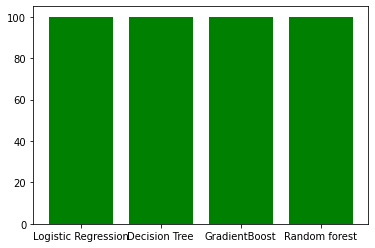

In [21]:
plt.bar(algos,accuracy,color='green')
plt.show()